## Loyalty Program - Customer Segmentation

## Customer Segmentation Model:
1. Demographic Information:
Age
Gender
Marital status
Household size
Education level
Occupation
Income level
2. Geographic Information:
Location (city, state, country)
Urban/rural classification
Proximity to branches or ATMs
3. Behavioral Data:
Transaction history (frequency, volume, type)
ATM usage patterns
Online banking activity (logins, session duration, transactions)
Channel preferences (branch, mobile app, website)
Customer service interactions (complaints, feedback)
Product engagement (usage of specific banking products)
4. Financial Data:
Account balances (savings, checking, investments)
Credit card usage (spending patterns, repayment behavior)
Loan history (types of loans, repayment behavior)
Investment portfolio (types of investments, risk tolerance)
Credit score and history
5. Psychographic and Lifestyle Data:
Attitudes towards banking and finance
Financial goals and aspirations
Risk tolerance
Spending habits and patterns
Hobbies and interests (relevant for targeted offers)
6. Customer Interactions and Engagement:
Customer satisfaction scores
Net Promoter Score (NPS)
Loyalty program participation
Cross-selling response rates
7. External Data (Optional):
Economic indicators (inflation rate, GDP growth)
Local market conditions
Competitive landscape analysis
8. Digital Footprint:
Social media behavior (if legally and ethically obtained)
Online shopping habits (if applicable)
Digital engagement with banking products/services
9. Life Events:
Major life events (marriage, birth of a child, retirement)
Significant financial milestones (buying a house, starting a business)
10. Customer Preferences and Feedback:
Surveys and feedback responses
Preferred communication channels
Product feature requests
11. Risk Profiles:
Risk assessment data (if relevant for financial products)
Credit risk indicators
12. Regulatory and Compliance Considerations:
Ensure data collection adheres to regulatory guidelines (e.g., GDPR, CCPA) and respects customer privacy.
 
 

In [1]:
# Import the libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

Data Pre-processing

In [2]:
#Read csv dataset file
df = pd.read_csv('bank_data_with_comprehensive_features.csv')
df.head(2)

,customer_id,age,gender,marital_status,household_size,education_level,occupation,income_level,location,state,...,social_media_behavior,online_shopping_habits,digital_engagement,major_life_events,significant_financial_milestones,survey_responses,preferred_communication_channels,product_feature_requests,risk_assessment_data,credit_risk_indicators
0,1,58,Female,Divorced,1,College,Employed,High,Suburban,IL,...,Moderate,Frequent,Low,NaN,Starting a Business,Negative,Phone,No,High Risk,Stable
1,2,48,Male,Single,5,High School,Unemployed,Medium,Suburban,FL,...,Moderate,Frequent,High,Birth of a Child,NaN,Neutral,Phone,No,Medium Risk,High Risk


## Age group was created based on frequency

In [5]:
df[df['age'] <= 35].shape[0]
df[df['age'] > 50].shape[0]

3819

In [9]:
# Define categories for Expense_Bucket
categories = ['Travel', 'Dining', 'Shopping', 'Insurance', 'Education']

# Create a function to assign random values with adjusted distribution
def assign_expense_bucket(age_group):
    if age_group <=35:
        # Adjust probabilities for 'Early age group'
        probabilities = [0.25, 0.2, 0.3, 0.1, 0.15]  # Adjust as needed
        return np.random.choice(categories, p=probabilities)
    elif age_group <=50:
        # Adjust probabilities for 'Early age group'
        probabilities = [0.25, 0.28, 0.22, 0.1, 0.15]  # Adjust as needed
        return np.random.choice(categories, p=probabilities)
    elif age_group >50:
        # Adjust probabilities for 'Early age group'
        probabilities = [0.2, 0.15, 0.25, 0.35, 0.05]  # Adjust as needed
        return np.random.choice(categories, p=probabilities)
# Assign random values to Expense_Bucket column
df['Expense_Bucket'] = df['age'].apply(assign_expense_bucket)

##np.random.choice(categories, size=len(df))

In [10]:
df.head(2)

,customer_id,age,gender,marital_status,household_size,education_level,occupation,income_level,location,state,...,online_shopping_habits,digital_engagement,major_life_events,significant_financial_milestones,survey_responses,preferred_communication_channels,product_feature_requests,risk_assessment_data,credit_risk_indicators,Expense_Bucket
0,1,58,Female,Divorced,1,College,Employed,High,Suburban,IL,...,Frequent,Low,NaN,Starting a Business,Negative,Phone,No,High Risk,Stable,Insurance
1,2,48,Male,Single,5,High School,Unemployed,Medium,Suburban,FL,...,Frequent,High,Birth of a Child,NaN,Neutral,Phone,No,Medium Risk,High Risk,Shopping


In [11]:
# Shape method provides information about the number of rows and columns in a DataFrame quickly and easily.
# Check the shape of the DataFrame
num_columns = df.shape[1]  # 1 refers to columns, 
num_rows = df.shape[0] #0 refers to rows

print("Total number of attributes:", num_columns)
print("Total number of datapoints:", num_rows)

Total number of attributes: 50
Total number of datapoints: 10000


In [12]:
# Check for missing/null values
df.isnull().sum()

customer_id                            0
age                                    0
gender                                 0
marital_status                         0
household_size                         0
education_level                        0
occupation                             0
income_level                           0
location                               0
state                                  0
country                                0
proximity_to_branch                    0
transaction_frequency                  0
transaction_volume                     0
transaction_type                       0
atm_usage_patterns                     0
online_banking_activity                0
channel_preferences                    0
customer_service_interactions          0
product_engagement                     0
savings_balance                        0
checking_balance                       0
investment_balance                     0
credit_card_usage                      0
loan_history    

In [13]:
df['investment_balance'].head()

0    97915.05482
1    77952.30138
2    80841.59662
3     8795.70734
4    98412.93116
Name: investment_balance, dtype: float64

There are null values found for "loan_history", "major_life_events","significant_financial_milestones"

Impute null values to 'Not Available' as this info is not available

In [14]:
# Impute null values to 'Not Available' as this info is not available
df['loan_history'].fillna('Not Available',inplace=True)
df['major_life_events'].fillna('Not Available',inplace=True)
df['significant_financial_milestones'].fillna('Not Available',inplace=True)

In [15]:
# Check the datatypes
df.dtypes

customer_id                           int64
age                                   int64
gender                               object
marital_status                       object
household_size                        int64
education_level                      object
occupation                           object
income_level                         object
location                             object
state                                object
country                              object
proximity_to_branch                  object
transaction_frequency                 int64
transaction_volume                  float64
transaction_type                     object
atm_usage_patterns                   object
online_banking_activity              object
channel_preferences                  object
customer_service_interactions        object
product_engagement                   object
savings_balance                     float64
checking_balance                    float64
investment_balance              

## Feature Engineering

In [16]:
# Convert 'cross_selling_response_rate' into percentage
df['cross_selling_response_rate'] = df['cross_selling_response_rate'].apply(lambda x: x * 100)

In [17]:
# Check Minimun & Maximum Age in the dataset
print("Minimun Age is ",df['age'].min())
print("Maximum Age is ",df['age'].max())

Minimun Age is  20
Maximum Age is  69


In [18]:
## loc function - (1) uses labels, not integer positions, for indexing ; (2) It is inclusive of both start and end labels in slicing ; (3) loc can be used to set values in the DataFrame as well.
# Assigning bands based on age ranges using if-else conditions
for i in range(len(df)):
    if df.loc[i, 'age'] >= 20 and df.loc[i, 'age'] <= 35:
        df.loc[i, 'age'] = "Early_age_group"
    elif df.loc[i, 'age'] >= 36 and df.loc[i, 'age'] <= 50:
        df.loc[i, 'age'] = "Mid_age_group"
    elif df.loc[i, 'age'] >= 51:
        df.loc[i, 'age'] = "Late_age_group"

In [19]:
# List of all categorical variables
cat_attribute= ['age', 'gender', 'marital_status',
       'education_level', 'occupation', 'income_level', 'location', 'state',
       'country', 'proximity_to_branch', 
       'transaction_type', 'atm_usage_patterns',
       'online_banking_activity', 'channel_preferences',
       'customer_service_interactions', 'product_engagement',
       'loan_history', 'loan_repayment_behavior',
       'investment_portfolio', 'attitudes_towards_banking',
       'financial_goals', 'risk_tolerance', 'spending_habits',
       'interests_hobbies', 'customer_satisfaction_score',
       'net_promoter_score', 'loyalty_program_participation',
       'social_media_behavior', 'online_shopping_habits', 'digital_engagement',
       'major_life_events', 'significant_financial_milestones',
       'survey_responses', 'preferred_communication_channels',
       'product_feature_requests', 'risk_assessment_data',
       'credit_risk_indicators','Expense_Bucket']

In [20]:
# Difference of two columns in pandas dataframe in Python is carried out by using following methods "columns.difference"
# Find columns with continuous values
num_attribute = df.columns.difference(cat_attribute)
num_attribute

Index(['checking_balance', 'credit_card_usage', 'credit_score',
       'cross_selling_response_rate', 'customer_id', 'gdp_growth',
       'household_size', 'inflation_rate', 'investment_balance',
       'savings_balance', 'transaction_frequency', 'transaction_volume'],
      dtype='object')

In [21]:
# Convert the variable classes into Label encoding
Label_encoder = LabelEncoder()
df_encoded = df.copy()
df_encoded[cat_attribute] = df_encoded[cat_attribute].apply(Label_encoder.fit_transform)

In [22]:
df_encoded.head()

,customer_id,age,gender,marital_status,household_size,education_level,occupation,income_level,location,state,...,online_shopping_habits,digital_engagement,major_life_events,significant_financial_milestones,survey_responses,preferred_communication_channels,product_feature_requests,risk_assessment_data,credit_risk_indicators,Expense_Bucket
0,1,1,0,0,1,1,0,0,1,2,...,0,1,2,2,0,2,0,0,1,2
1,2,2,1,2,5,2,3,2,1,1,...,0,0,0,1,1,2,0,2,0,3
2,3,0,0,1,4,0,0,0,1,0,...,1,1,2,0,1,0,0,1,2,3
3,4,1,1,2,5,4,0,2,0,2,...,1,1,3,1,2,1,0,1,1,0
4,5,0,0,2,5,2,3,0,1,3,...,0,0,1,1,2,1,1,2,0,3


In [23]:
# Standardization for continuous numeric features where scale & distribution can vary

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_transformed = df_encoded.copy()
df_transformed[num_attribute] = scaler.fit_transform(df_transformed[num_attribute])

In [24]:
df_transformed.head()

,customer_id,age,gender,marital_status,household_size,education_level,occupation,income_level,location,state,...,online_shopping_habits,digital_engagement,major_life_events,significant_financial_milestones,survey_responses,preferred_communication_channels,product_feature_requests,risk_assessment_data,credit_risk_indicators,Expense_Bucket
0,-1.731878,1,0,0,-1.446257,1,0,0,1,2,...,0,1,2,2,0,2,0,0,1,2
1,-1.731531,2,1,2,1.377361,2,3,2,1,1,...,0,0,0,1,1,2,0,2,0,3
2,-1.731185,0,0,1,0.671456,0,0,0,1,0,...,1,1,2,0,1,0,0,1,2,3
3,-1.730838,1,1,2,1.377361,4,0,2,0,2,...,1,1,3,1,2,1,0,1,1,0
4,-1.730492,0,0,2,1.377361,2,3,0,1,3,...,0,0,1,1,2,1,1,2,0,3


In [25]:
# Checking the statistical analysis for the dataframe
df_transformed.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
customer_id,10000.0,-9.094947e-17,1.000050,-1.731878,-0.865939,0.000000,0.865939,1.731878
age,10000.0,9.945000e-01,0.786213,0.000000,0.000000,1.000000,2.000000,2.000000
gender,10000.0,4.995000e-01,0.500025,0.000000,0.000000,0.000000,1.000000,1.000000
marital_status,10000.0,1.497300e+00,1.114324,0.000000,1.000000,1.000000,2.000000,3.000000
household_size,10000.0,4.583001e-17,1.000050,-1.446257,-0.740353,-0.034448,0.671456,1.377361
education_level,10000.0,2.005200e+00,1.411798,0.000000,1.000000,2.000000,3.000000,4.000000
occupation,10000.0,1.503400e+00,1.109915,0.000000,1.000000,1.000000,2.000000,3.000000
income_level,10000.0,9.999000e-01,0.814841,0.000000,0.000000,1.000000,2.000000,2.000000
location,10000.0,1.008000e+00,0.814618,0.000000,0.000000,1.000000,2.000000,2.000000
state,10000.0,1.993000e+00,1.410727,0.000000,1.000000,2.000000,3.000000,4.000000


# Module 2.3 - Exploratory Data Analysis

### Outlier Analysis

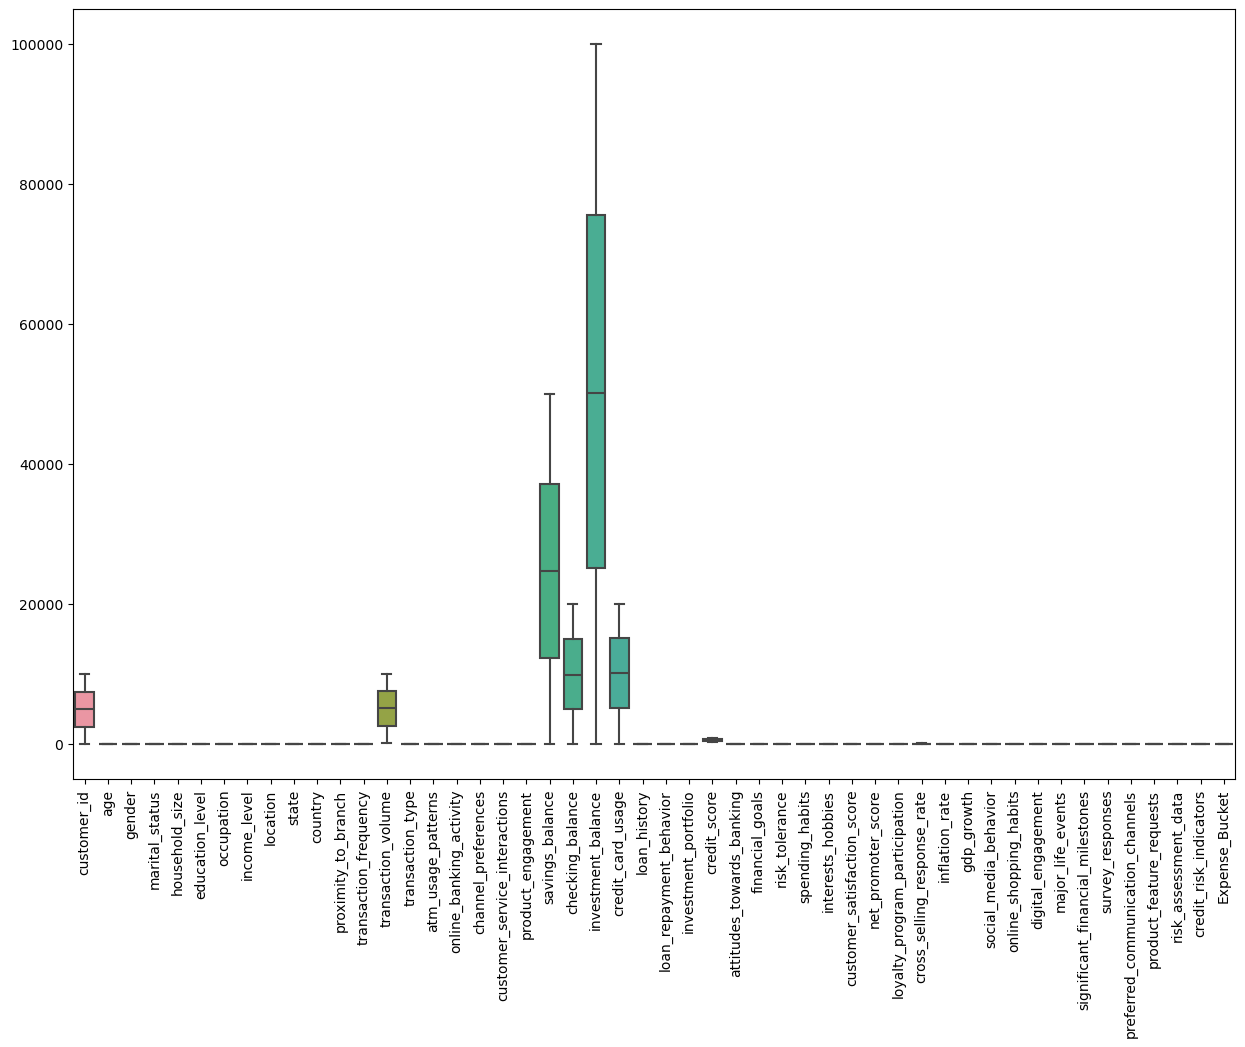

In [26]:
# Outlier Analysis
sns.boxplot(data = df_encoded)
fig=plt.gcf()
fig.set_size_inches(15,10)
plt.xticks(rotation=90)
plt.show()

### *Inference*

There are no significant outliers observed in the dataset

## Correlation Analysis

Text(0.5, 1.0, 'Correlation Analysis')

<Figure size 500x500 with 0 Axes>

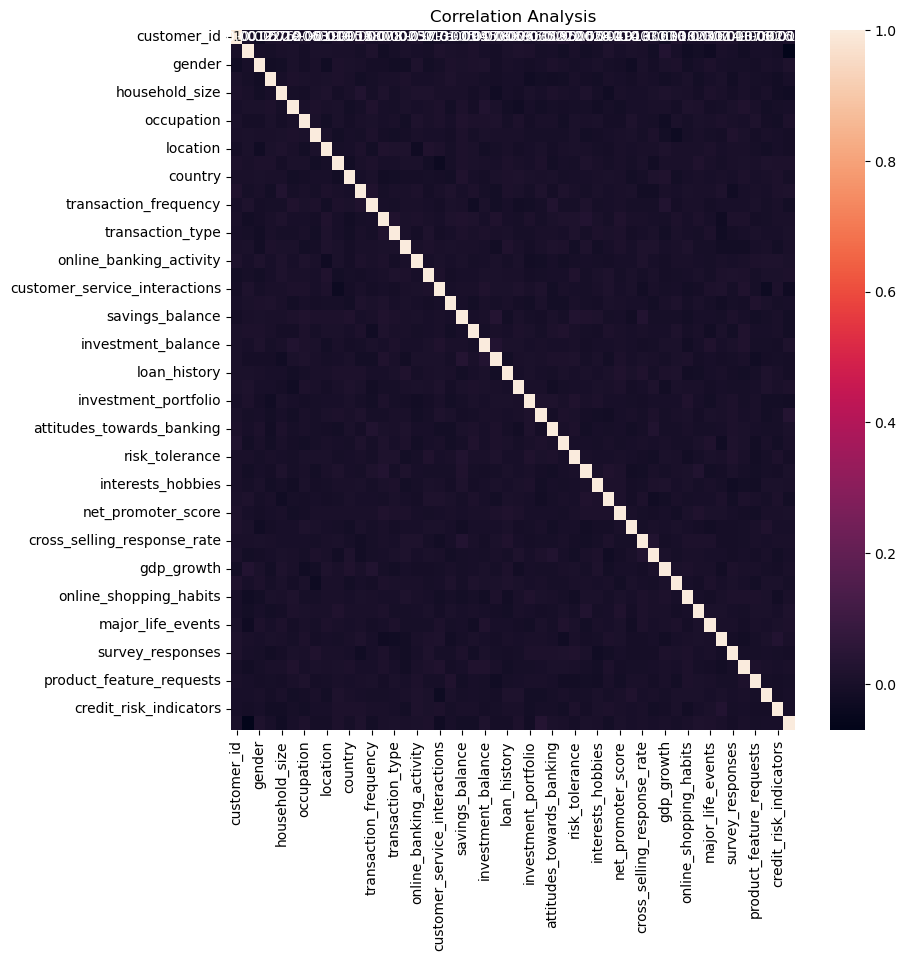

In [27]:
# Correlation Analysis is not required for Un-Supervised Models like - Clustering Analysis as there is no requirement for us to access Relationship within Independent Features...
plt.figure(figsize=(5, 5))

plt.figure(figsize=(20,20))
plt.subplot(2, 2, 1)
sns.heatmap(df_encoded.corr(), annot=True)
plt.title('Correlation Analysis')

In [21]:
# Loyalty membership vs No membership
labels = ['No membership','Loyalty membership']
colors = ['orange','tan']
fig1 = go.Figure(data = [go.Pie(labels=labels, values = df_encoded.groupby('loyalty_program_participation')['customer_id'].count().tolist(),marker = dict(colors=colors), pull=[0,0.2])])
fig1.show()

### *Inference*
60.2% customers are enrolled with Loyalty membership and 
39.8% customers are not yet enrolled with Loyalty membership

In [22]:
Bucket = df.groupby(['age','Expense_Bucket']).size().reset_index(name='Count')
fig = px.bar(Bucket, x="Expense_Bucket", y="Count", color="age", title="Expense Bucket Vs Age group" ,text = "Count")
fig.show()

### *Inference*

1. Early age group spends more into Shopping and Travelling.
2. Mid age group spends more into Dining and Travelling.
3. Elderly people spend more into Insurance and shopping.

# Model Selection
## 1. Principle Component Analysis

In [23]:
from sklearn.decomposition import PCA

#This parameter specifies that PCA should retain enough components to explain at least 95% of the variance in the dataset. 
#PCA calculates the principal components (or eigenvectors) of the dataset and sorts them by the amount of variance they explain. 
#By setting n_components=0.95, PCA will automatically choose the smallest number of principal components such that the explained variance ratio is at least 95%.

pca = PCA(2) 
pca_data = pd.DataFrame(pca.fit_transform(df_transformed),columns=['PC1','PC2']) 

## 2. K-means clustering

Finding the optimal number of clusters using Elbow method

Text(0.2, 0.55, 'Elbow')

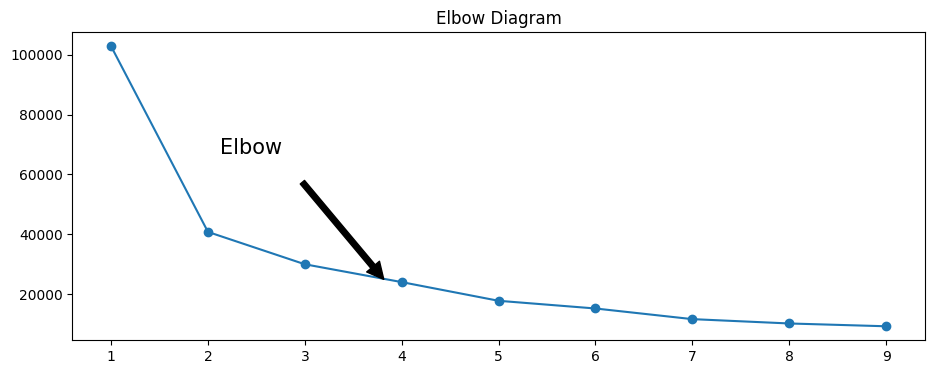

In [24]:
from sklearn.cluster import KMeans
cluster_range = range(1,10)
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters)
    clusters.fit(pca_data)
    cluster_errors.append(clusters.inertia_)

plt.figure(figsize=(11,4))
plt.plot(cluster_range,cluster_errors,marker="o");
plt.title("Elbow Diagram");
plt.annotate('Elbow',
             xy=(4, cluster_errors[4]),
             xytext=(0.20,0.55),
             textcoords='figure fraction',
             fontsize=15,
             arrowprops=dict(facecolor='black',shrink=0.15)
             )

### *Inference*

Number of cluster as explained by Elbow method is 3 or 4.

## *Model Validation* - Evaluating the quality of clusters using *Silhoutte score*

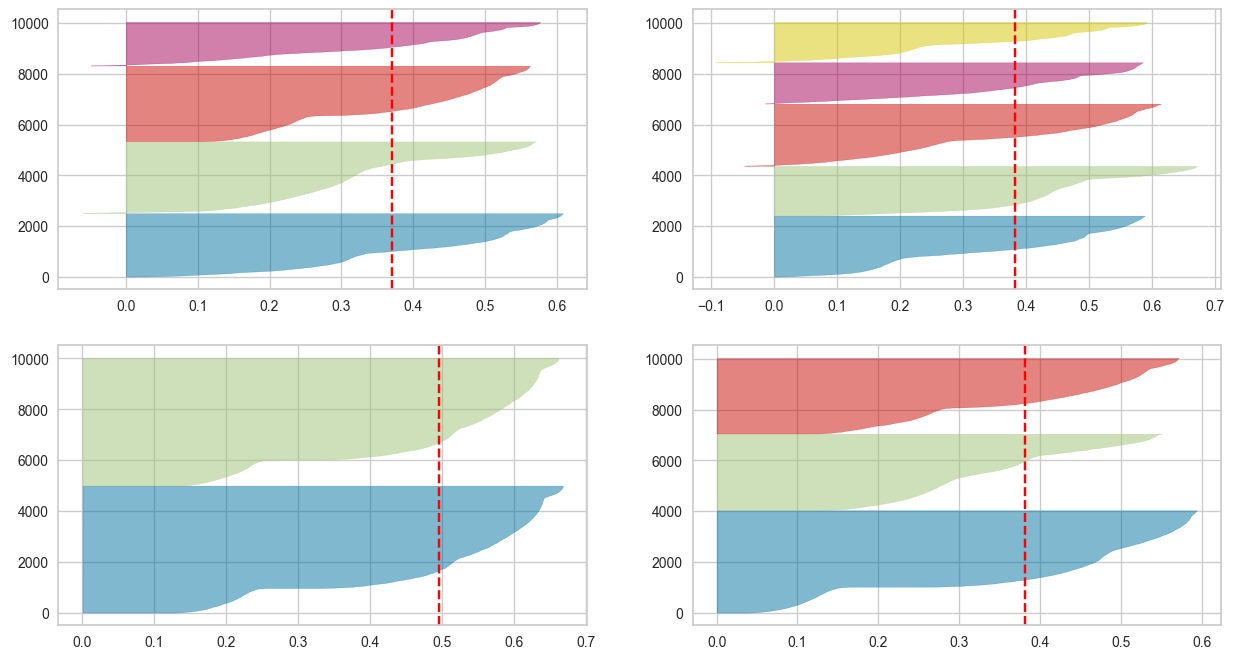

In [25]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2,2, figsize=(15,8))
num_clusters = [2,3,4,5]
for i,k in enumerate(num_clusters):
    km=KMeans(n_clusters=k,
              random_state=42)
    q, mod =divmod(i,2)
    visualizer = SilhouetteVisualizer(km,colors='yellowbrick',
                                      ax=ax[q-1][mod])
    visualizer.fit(pca_data)

In [26]:
k=3

clusters = KMeans(k,random_state=42)
clusters.fit(pca_data)
pca_data['cluster_id']=clusters.labels_
clusters.labels_

array([2, 0, 2, ..., 0, 1, 0], dtype=int32)

In [27]:
from sklearn.metrics import silhouette_samples,silhouette_score

#Calculate the silhoutte score for each sample
silhouette_values = silhouette_samples(df_transformed,clusters.labels_)
df['silhouette_score'] = silhouette_values

#To make sure if all the records are in their respective clusters
len(df[df["silhouette_score"]< -0.07])

0

### *Inference*

Silhoutte score closer to 1 , means very good clusters.
Silhoutte score closer to 0, means clusters are overlaping, which is in our case

# Cluster Visualization

<Axes: xlabel='PC1', ylabel='PC2'>

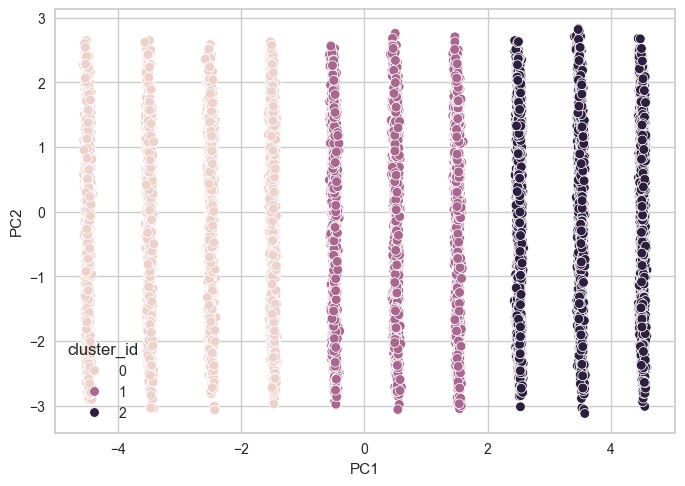

In [28]:
#PCA model clusters
sns.scatterplot(x="PC1",y="PC2",hue="cluster_id",data=pca_data)

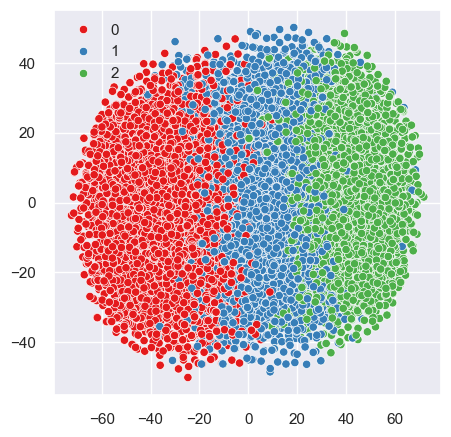

In [29]:
# plot the clusters for transformed data
from sklearn.manifold import TSNE
tsne=TSNE()
visualization=tsne.fit_transform(df_transformed)
sns.set(rc={'figure.figsize':(5,5)})
sns.scatterplot(x=visualization[:,0],y=visualization[:,1],
               hue=clusters.labels_,
               palette=sns.color_palette('Set1',3))
plt.show()

### Model Inference:

There are three clusters with slight overlaping.

# Customer Profiling

In [30]:
df_transformed['cluster'] = clusters.labels_
df['cluster'] = clusters.labels_

In [31]:
df_encoded['cluster'] = clusters.labels_
df_encoded['cluster'] = clusters.labels_

In [32]:
df_transformed.columns

Index(['customer_id', 'age', 'gender', 'marital_status', 'household_size',
       'education_level', 'occupation', 'income_level', 'location', 'state',
       'country', 'proximity_to_branch', 'transaction_frequency',
       'transaction_volume', 'transaction_type', 'atm_usage_patterns',
       'online_banking_activity', 'channel_preferences',
       'customer_service_interactions', 'product_engagement',
       'savings_balance', 'checking_balance', 'investment_balance',
       'credit_card_usage', 'loan_history', 'loan_repayment_behavior',
       'investment_portfolio', 'credit_score', 'attitudes_towards_banking',
       'financial_goals', 'risk_tolerance', 'spending_habits',
       'interests_hobbies', 'customer_satisfaction_score',
       'net_promoter_score', 'loyalty_program_participation',
       'cross_selling_response_rate', 'inflation_rate', 'gdp_growth',
       'social_media_behavior', 'online_shopping_habits', 'digital_engagement',
       'major_life_events', 'significant_fi

<Axes: xlabel='cluster', ylabel='count'>

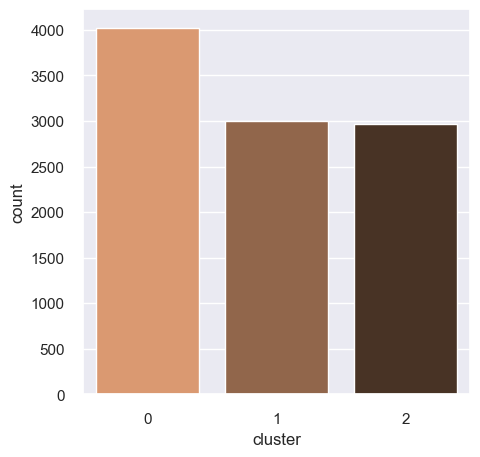

In [33]:
sns.countplot(data=df_transformed, x='cluster', palette='copper_r')

### *Inference*

*cluster 0 has 3000 records*

*cluster 1 has 4000 records*

*cluster 2 has 3000 records*

In [34]:
# Analyze each cluster and create profiles on transformed data
cluster_profile = df_transformed.groupby('cluster').agg({
    'age': lambda x: x.value_counts().index[0],
    'gender' : lambda x: x.value_counts().index[0],
    'marital_status': lambda x: x.value_counts().index[0],
    'household_size': 'mean',
    'education_level': lambda x: x.value_counts().index[0],
    'occupation': lambda x: x.value_counts().index[0],
    'income_level': 'mean',
    'location': lambda x: x.value_counts().index[0],
    'state':lambda x: x.value_counts().index[0],
    'country' : lambda x: x.value_counts().index[0],
    'proximity_to_branch' : lambda x: x.value_counts().index[0], 
    'transaction_frequency': 'mean',
    'transaction_volume': 'mean', 
    'transaction_type' :lambda x: x.value_counts().index[0], 
    'atm_usage_patterns' :lambda x: x.value_counts().index[0],
    'online_banking_activity' :lambda x: x.value_counts().index[0],
    'channel_preferences' :lambda x: x.value_counts().index[0],
    'customer_service_interactions' :lambda x: x.value_counts().index[0],
    'product_engagement' :lambda x: x.value_counts().index[0],
    'savings_balance' :'mean', 
    'checking_balance' :'mean', 
    'investment_balance' :'mean',
    'credit_card_usage' :'mean', 
    'loan_history' : lambda x: x.value_counts().index[0], 
    'loan_repayment_behavior' :lambda x: x.value_counts().index[0],
    'investment_portfolio' :lambda x: x.value_counts().index[0], 
    'credit_score' :'mean', 
    'attitudes_towards_banking' :lambda x: x.value_counts().index[0],
    'financial_goals' :lambda x: x.value_counts().index[0], 
    'risk_tolerance' :lambda x: x.value_counts().index[0], 
    'spending_habits':lambda x: x.value_counts().index[0],
    'interests_hobbies' :lambda x: x.value_counts().index[0], 
    'customer_satisfaction_score' :lambda x: x.value_counts().index[0],
    'net_promoter_score' :lambda x: x.value_counts().index[0], 
    'loyalty_program_participation' :lambda x: x.value_counts().index[0],
    'cross_selling_response_rate' :lambda x: x.value_counts().index[0], 
    'inflation_rate':'mean', 
    'gdp_growth' :'mean',
    'social_media_behavior' :lambda x: x.value_counts().index[0], 
    'online_shopping_habits' :lambda x: x.value_counts().index[0], 
    'digital_engagement' :lambda x: x.value_counts().index[0],
    'major_life_events' :lambda x: x.value_counts().index[0], 
    'significant_financial_milestones' :lambda x: x.value_counts().index[0],
    'survey_responses' : lambda x: x.value_counts().index[0], 
    'preferred_communication_channels': lambda x: x.value_counts().index[0],
    'product_feature_requests' :lambda x: x.value_counts().index[0], 
    'risk_assessment_data' :lambda x: x.value_counts().index[0],
    'credit_risk_indicators': lambda x: x.value_counts().index[0],
    'Expense_Bucket' : lambda x: x.value_counts().index[0]}).reset_index()

# Print or visualize cluster profiles
cluster_profile

,cluster,age,gender,marital_status,household_size,education_level,occupation,income_level,location,state,...,online_shopping_habits,digital_engagement,major_life_events,significant_financial_milestones,survey_responses,preferred_communication_channels,product_feature_requests,risk_assessment_data,credit_risk_indicators,Expense_Bucket
0,0,1,1,1,-0.008310,3,2,1.002734,2,3,...,0,1,1,1,2,3,0,0,0,3
1,1,1,0,2,0.005487,3,1,0.991348,2,1,...,0,1,3,1,1,2,0,2,1,3
2,2,1,0,1,0.005706,3,2,1.004712,1,3,...,2,2,2,0,1,1,0,0,0,3


In [35]:
test = df_encoded.groupby(['cluster','loyalty_program_participation','income_level']).size().reset_index(name='Loyalty Program members')
test = test[test['loyalty_program_participation']==1].reset_index(drop = True)
test

,cluster,loyalty_program_participation,income_level,Loyalty Progream members
0,0,1,0,794
1,0,1,1,815
2,0,1,2,807
3,1,1,0,627
4,1,1,1,606
5,1,1,2,588
6,2,1,0,564
7,2,1,1,603
8,2,1,2,617


In [36]:
import plotly.express as px
fig1 = px.bar(test, y="Loyalty Progream members", x="income_level",
             color='cluster', barmode='group',text = 'Loyalty Progream members', title = 'Analysis of number of Loyalty cuctomers in each cluster for each income level',
             height=400)
fig1.show()


### Cluster Inference:-
1. Cluster-2 has maximum number of customers enrolled for loyalty program in all three income levels.
2. All three clusters have loyalty customers belonging to all types of levels of income - Low, Medium & High


In [37]:
# Customer Satisfaction Score is higher for which cluster
happy_customer = df_encoded.groupby(['customer_satisfaction_score','cluster']).size().reset_index(name='Count')
fig = px.bar(happy_customer, x="customer_satisfaction_score", y="Count", color="cluster", title="What is the Customer Satisfaction level in each cluster" ,text = "Count")
fig.show()

### *Cluster Inference*

*X axis: 0: Very Unsatisfied , 1: Unsatisfied , 2: Satisfied ,3: Very Satisfied*

1. Cluster 0 have more bumber of customers who are 'Satisfied'

2. Cluster 1 have more customers who are 'Extremely UnSatisfied'

3. Cluster 2 have more clusters who are 'Very Satisfied'

In [39]:
# What is the Expense bucket distribution in each cluster
expense_buc = df_encoded.groupby(['Expense_Bucket','cluster']).size().reset_index(name='Count')
fig = px.bar(expense_buc, x="Expense_Bucket", y="Count", color="cluster", title="What is the Expense bucket distribution in each cluster" ,text = "Count")
fig.show()

### *Cluster Inference*

*Xaxis: 0:Dining ,1:Education ,2:Insurance ,3:Shopping ,4:Travel*

All three Clusters have customers with highest expense in Shopping, followed by Travel


# ***Gaussian Mixture Model***

In [40]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(df_transformed)


GaussianMixture(n_components=3, n_init=10, random_state=42)

In [41]:
gm.weights_

array([0.3005, 0.4024, 0.2971])

In [42]:
# Did your algorithm actually converge
gm.converged_

True

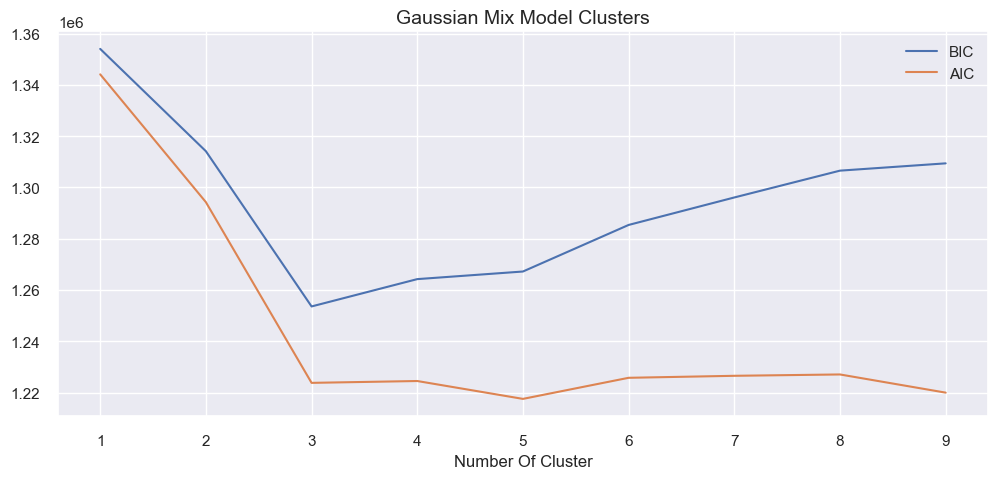

In [49]:
#Prepare
n_component = np.arange(1,10)

#Create GGM Model
models = [GaussianMixture(n_components = n,
                          random_state=42).fit(df_transformed) for n in n_component]
#Plot
plt.figure(figsize=(12, 5))
plt.plot(n_component,
         [m.bic(df_transformed) for m in models],
         label = 'BIC')
plt.plot(n_component,
         [m.aic(df_transformed) for m in models],
         label = 'AIC')
plt.legend()
plt.xlabel("Number Of Cluster")
#Add a title
plt.title('Gaussian Mix Model Clusters', fontsize=14) 
plt.show()

**Gaussian Mix Model Inference**

Both BIC & AIC lines converges at 3, hence optimal number of clusters are 3.